<a href="https://colab.research.google.com/github/IqraSaleemBatool/P-S-/blob/main/P%26S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score,mean_absolute_error
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/My Drive/student_sleep_patterns.csv')
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Student_ID  Age Gender University_Year  Sleep_Duration  Study_Hours  \
0           1   24  Other        2nd Year             7.7          7.9   
1           2   21   Male        1st Year             6.3          6.0   
2           3   22   Male        4th Year             5.1          6.7   
3           4   24  Other        4th Year             6.3          8.6   
4           5   20   Male        4th Year             4.7          2.7   

   Screen_Time  Caffeine_Intake  Physical_Activity  Sleep_Quality  \
0          3.4                2                 37             10   
1          1.9                5                 74              2   
2          3.9                5                 53              5   
3          2.8                4                 55              9   
4          2.7                0                 85              3   

   Weekday_

In [6]:
print(df.isnull().sum())

Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64


In [8]:
# my dataset donot have any null value so I donot need to replace missing values with mode
df=df.drop_duplicates()

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB
None


In [10]:
print(df.describe())

       Student_ID        Age  Sleep_Duration  Study_Hours  Screen_Time  \
count  500.000000  500.00000      500.000000   500.000000   500.000000   
mean   250.500000   21.53600        6.472400     5.981600     2.525000   
std    144.481833    2.33315        1.485764     3.475725     0.859414   
min      1.000000   18.00000        4.000000     0.100000     1.000000   
25%    125.750000   20.00000        5.100000     2.900000     1.800000   
50%    250.500000   21.00000        6.500000     6.050000     2.600000   
75%    375.250000   24.00000        7.800000     8.800000     3.300000   
max    500.000000   25.00000        9.000000    12.000000     4.000000   

       Caffeine_Intake  Physical_Activity  Sleep_Quality  Weekday_Sleep_Start  \
count       500.000000         500.000000     500.000000           500.000000   
mean          2.462000          62.342000       5.362000            11.166860   
std           1.682325          35.191674       2.967249             5.972352   
min      

In [12]:
# Frequency Distribution Category Columns
categorical_columns=['Gender','University_Year','Physical_Activity']
for col in categorical_columns:
  print(f'\nFrequency Distribution for {col}:')
  print(df[col].value_counts())


Frequency Distribution for Gender:
Gender
Male      186
Female    166
Other     148
Name: count, dtype: int64

Frequency Distribution for University_Year:
University_Year
3rd Year    132
2nd Year    131
1st Year    125
4th Year    112
Name: count, dtype: int64

Frequency Distribution for Physical_Activity:
Physical_Activity
53     9
27     9
92     8
99     8
108    8
      ..
30     1
82     1
72     1
13     1
62     1
Name: count, Length: 120, dtype: int64


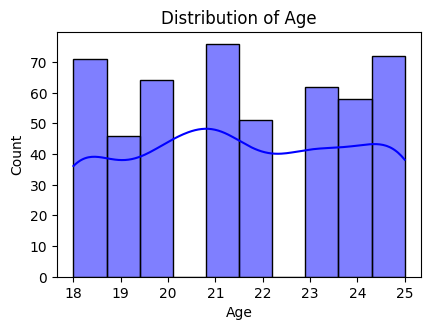

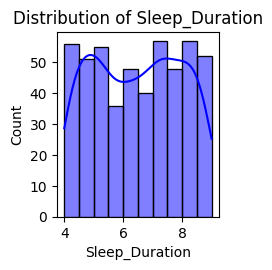

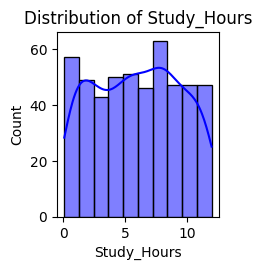

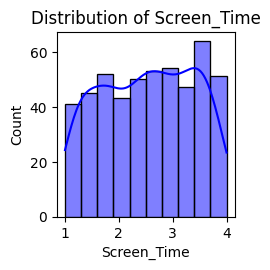

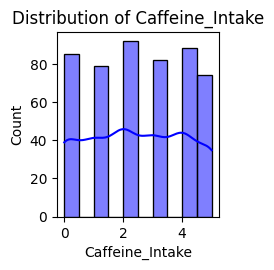

In [15]:
# Continous Column For Histogram
continuous_columns = ['Age','Sleep_Duration','Study_Hours','Screen_Time','Caffeine_Intake']
# plot histogram for Continous Variables
plt.figure(figsize=(12,6))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=10, color='blue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

    plt.show()



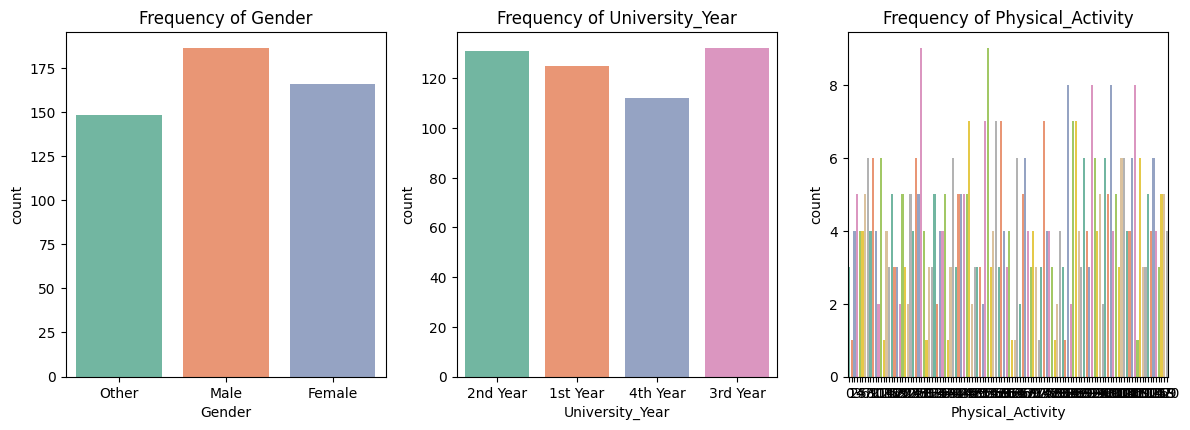

In [17]:
# Categorical columns for bar plot
categorical_columns = ['Gender','University_Year','Physical_Activity']

# Plot bar plots for categorical variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[col],hue=df[col],palette='Set2',legend=False)  # Added hue=df[col]
    plt.title(f'Frequency of {col}')
    plt.tight_layout()

plt.show()


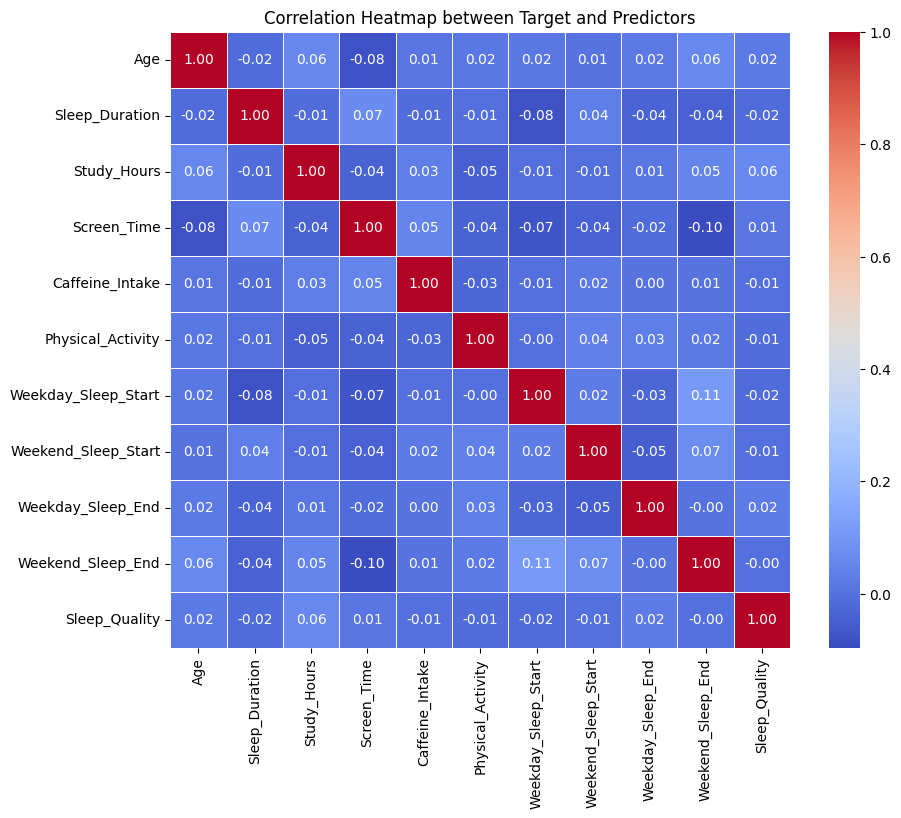

In [18]:
# Calculate correlation matrix for target and predictors
target = 'Sleep_Quality'
predictors = ['Age','Sleep_Duration','Study_Hours','Screen_Time','Caffeine_Intake',
              'Physical_Activity','Weekday_Sleep_Start','Weekend_Sleep_Start',
              'Weekday_Sleep_End','Weekend_Sleep_End']

# Calculate the correlation matrix
correlations = df[predictors + [target]].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap between Target and Predictors')
plt.show()


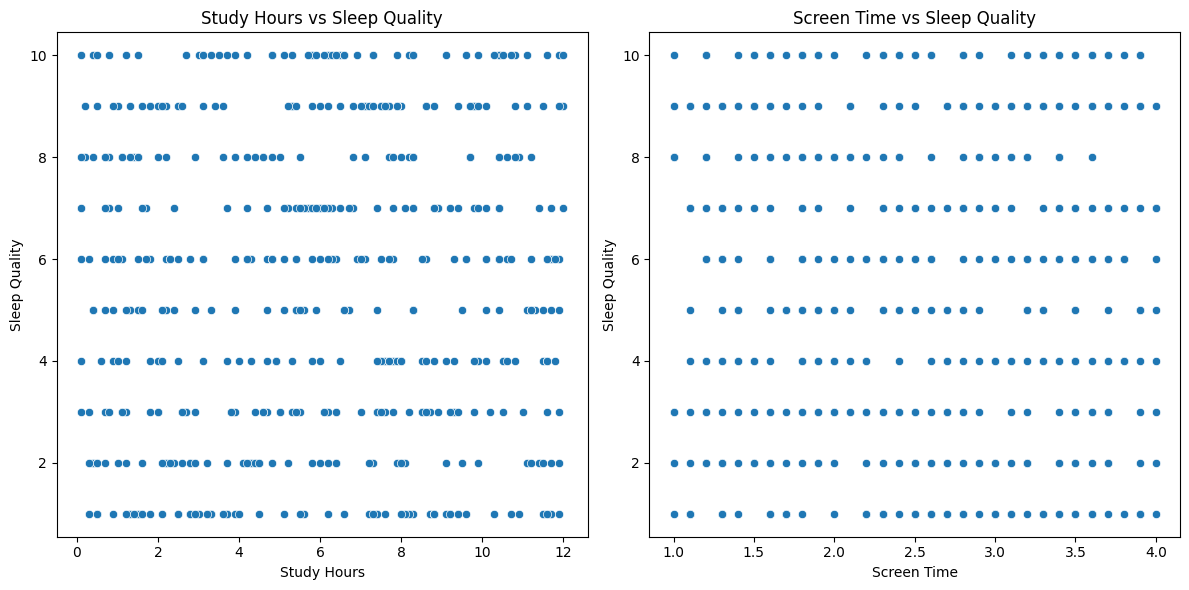

In [19]:
# Scatter plots for bivariate analysis
plt.figure(figsize=(12, 6))

# Scatter plot for 'Study_Hours' vs. 'Sleep_Quality'
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Study_Hours'], y=df['Sleep_Quality'])
plt.title('Study Hours vs Sleep Quality')
plt.xlabel('Study Hours')
plt.ylabel('Sleep Quality')

# Scatter plot for 'Screen_Time' vs. 'Sleep_Quality'
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Screen_Time'], y=df['Sleep_Quality'])
plt.title('Screen Time vs Sleep Quality')
plt.xlabel('Screen Time')
plt.ylabel('Sleep Quality')

plt.tight_layout()
plt.show()


In [20]:
# Identifying Outliers in dataset
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numeric column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)

# Calculate the IQR (Interquartile Range) for each numeric column
IQR = Q3 - Q1

# Define the lower and upper bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where any numeric column value is below the lower bound or above the upper bound
df_cleaned = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

# Check the number of rows before and after removing outliers
print(f"Before removing outliers: {len(df)} rows")
print(f"After removing outliers: {len(df_cleaned)} rows")


Before removing outliers: 500 rows
After removing outliers: 500 rows


In [22]:
# Performing z-Score
from  scipy import stats
# Calculate Z-scores for all numeric columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Define a threshold to identify outliers (commonly 3)
threshold = 3

# Remove rows where any numeric column has a Z-score greater than the threshold
df_cleaned_zscore = df[(z_scores < threshold).all(axis=1)]

# Check the number of rows before and after removing outliers
print(f"Before removing outliers: {len(df)} rows")
print(f"After removing outliers: {len(df_cleaned_zscore)} rows")


Before removing outliers: 500 rows
After removing outliers: 500 rows


In [23]:
# Hypothesis Testing
# Chi-Square Test for Categorical Variables
from scipy.stats import chi2_contingency

# Create a contingency table for the two categorical variables
contingency_table = pd.crosstab(df['Gender'], df['Physical_Activity'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

# Interpret the result
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the Null Hypothesis: There is a significant association between Gender and Physical Activity.")
else:
    print("Fail to Reject the Null Hypothesis: There is no significant association between Gender and Physical Activity.")


Chi-Square Statistic: 234.4923755788991
P-Value: 0.5520996637143765
Degrees of Freedom: 238
Expected Frequencies: 
[[0.996 0.332 1.328 1.66  1.328 1.328 1.66  1.992 1.328 1.992 1.328 0.664
  1.992 0.332 1.328 0.996 1.66  0.996 0.996 0.664 1.66  0.996 0.664 1.66
  1.328 1.992 1.66  2.988 1.328 0.332 0.996 0.996 1.66  0.664 1.328 1.328
  1.66  0.332 0.996 1.992 0.996 1.66  1.66  1.66  1.66  2.324 0.664 0.996
  0.996 0.996 0.664 2.324 2.988 0.996 1.328 2.324 0.996 2.324 1.328 0.996
  1.328 0.332 0.332 1.992 0.664 1.66  1.992 1.328 0.996 1.328 0.996 0.332
  0.996 2.324 1.328 1.328 0.996 0.332 0.664 1.328 0.996 0.332 2.656 0.664
  2.324 2.324 1.328 0.996 1.992 1.328 0.996 2.656 1.992 1.328 1.66  0.664
  1.992 1.66  2.656 1.328 1.66  0.996 1.992 1.992 1.328 1.328 1.992 2.656
  0.332 1.992 0.996 0.996 1.66  1.328 1.992 1.328 0.996 1.66  1.66  1.328]
 [1.116 0.372 1.488 1.86  1.488 1.488 1.86  2.232 1.488 2.232 1.488 0.744
  2.232 0.372 1.488 1.116 1.86  1.116 1.116 0.744 1.86  1.116 0.744 1.8

In [24]:
# T-Test for Numerical Variables
from scipy.stats import ttest_ind

# Separate the data into two groups (Male and Female)
male_study_hours = df[df['Gender'] == 'Male']['Study_Hours']
female_study_hours = df[df['Gender'] == 'Female']['Study_Hours']

# Perform an independent T-Test
t_stat, p_value = ttest_ind(male_study_hours, female_study_hours)

# Output the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the Null Hypothesis: The mean Study Hours between Male and Female students is significantly different.")
else:
    print("Fail to Reject the Null Hypothesis: The mean Study Hours between Male and Female students is not significantly different.")


T-Statistic: 1.3769378480231378
P-Value: 0.1694115180907453
Fail to Reject the Null Hypothesis: The mean Study Hours between Male and Female students is not significantly different.


In [25]:
# preparing data for Machine Learning
# Target variable
Y = df['Study_Hours']

# Drop the target column from features
X = df.drop('Study_Hours', axis=1)

# If you have categorical variables, you can use one-hot encoding or label encoding
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables


In [26]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Verify the shapes of the splits
print(f"Training data (X_train): {X_train.shape}")
print(f"Testing data (X_test): {X_test.shape}")
print(f"Training labels (Y_train): {Y_train.shape}")
print(f"Testing labels (Y_test): {Y_test.shape}")


Training data (X_train): (400, 16)
Testing data (X_test): (100, 16)
Training labels (Y_train): (400,)
Testing labels (Y_test): (100,)


In [27]:
# Normalization/Standarization of dataset
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
# Linear Regression
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared: {r2}")


Mean Squared Error: 10.621578359447074
Mean Absolute Error: 2.782717764849273
R-Squared: -0.058976247706099105


In [34]:
# Classification
# Assume 'df' is your DataFrame and 'Study_Hours' is your target variable.

# Step 1: Create categories for the continuous 'Study_Hours' variable
bins = [0, 5, 10, float('inf')]  # Bins: low (0-5), medium (5-10), high (10+)
labels = ['Low', 'Medium', 'High']  # Labels for each category

# Discretize 'Study_Hours' into categories
df['Study_Hours_Category'] = pd.cut(df['Study_Hours'], bins=bins, labels=labels)

# Step 2: Define the target variable Y (now categorical)
Y = df['Study_Hours_Category']

# Step 3: Select the feature variables (X)
X = df.drop(['Study_Hours', 'Study_Hours_Category'], axis=1)

# Step 4: One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Step 5: Split the data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 6: Standardize the features (important for most models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Create a logistic regression model for multi-class classification
model = LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs')

# Step 8: Train the model using the training data
model.fit(X_train_scaled, Y_train)

# Step 9: Make predictions on the test data
Y_pred = model.predict(X_test_scaled)

# Step 10: Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro', labels=['Low', 'Medium', 'High'])
recall = recall_score(Y_test, Y_pred, average='macro', labels=['Low', 'Medium', 'High'])
conf_matrix = confusion_matrix(Y_test, Y_pred, labels=['Low', 'Medium', 'High'])

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix: \n{conf_matrix}")


Accuracy: 0.5
Precision: 0.33426704014939307
Recall: 0.37104072398190047
Confusion Matrix: 
[[22 17  0]
 [23 28  0]
 [ 6  4  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


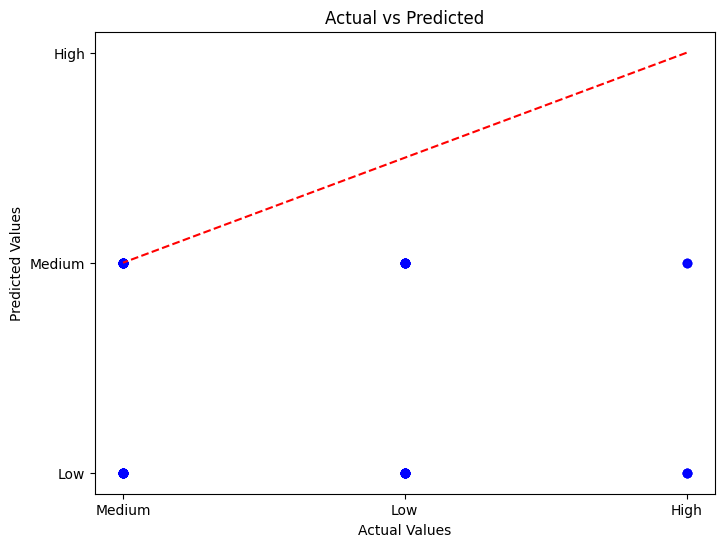

In [35]:
# Plot Actual vs Predicted for regression
plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Diagonal line for perfect prediction
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


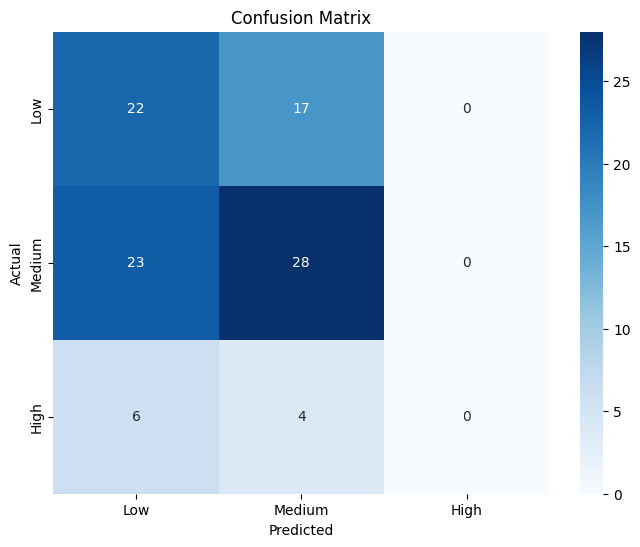

In [36]:


# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred, labels=['Low', 'Medium', 'High'])

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
